In [2]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

from py.plots.plotting import plotQuadrants, plotTraceDeterminant

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

ee = 0.125
ii = -0.225

In [7]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatter=False,
                    title='State space for default values', colorbar=True):
    
    path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
    plt.style.use(path + 'template.mplstyle')
    
    p_colors = cm.get_cmap('Accent', 4)
    
    stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
    turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
    p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
 #   p_downs = df.pivot_table('p_down', columns=xaxis, index=yaxis)
 #   compare = p_randoms.eq(p_downs)
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(stabis, nmb_labels)
    
    pos = ax.imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
    ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu')
    ax.contour(turings, origin='lower', vmin=0, vmax=2, levels=1, cmap='RdGy', linestyles='dashed')
 #   ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors='darkslategrey', linestyles='dotted')
    
    
    ax.set(title=title)
    
    
    
    if scatter:
        scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
        scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
        xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
        ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
        ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], ynodes[list(stabis.index.values).index(scatter1)], s=150, c='yellow', marker='*', zorder=2) 
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    mini = 1
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        
        
        cbar.minorticks_on()
        
    
        
    plt.legend(loc='lower right')
    
    
    
    plt.show()

In [8]:
df_show = pd.read_csv('csv/adaps_b_05_taua_600.csv')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1589/1099491900.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1589/1099491900.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


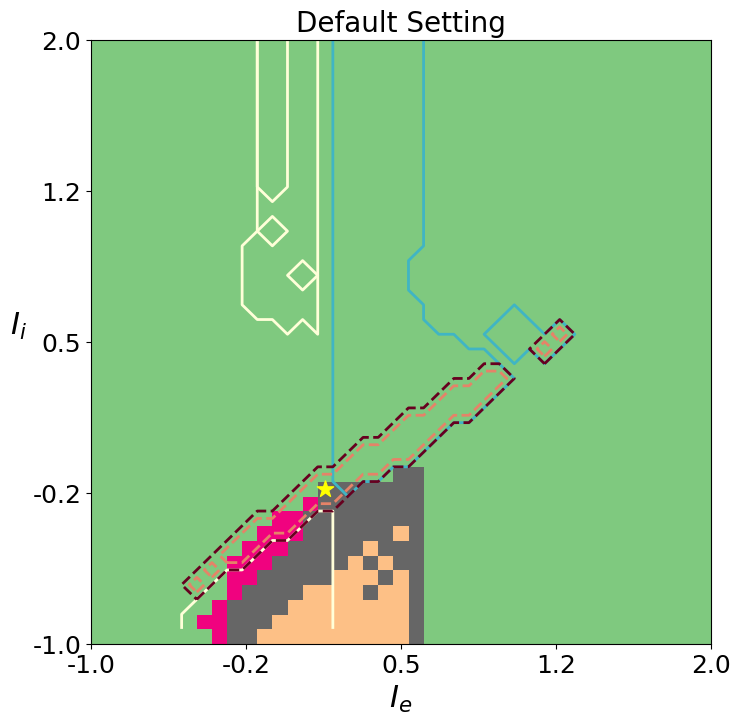

In [9]:
plotDiscreteMap(df_show, xaxis='I_e', yaxis='I_i', scatter=[ee, ii], 
                title = 'Default Setting', colorbar=False)

In [12]:
a = df_show[df_show['turing']>0]
b = a[a['stability']==2]
b

,Unnamed: 0,I_e,I_i,stability,turing,turing_hopf,p_random
666,0,0.200,-0.250,2,1,0,4
667,0,0.200,-0.175,2,1,0,1
708,0,0.275,-0.175,2,1,0,1
709,0,0.275,-0.100,2,1,0,1
749,0,0.350,-0.175,2,1,0,1
750,0,0.350,-0.100,2,1,0,1
791,0,0.425,-0.100,2,1,0,1
792,0,0.425,-0.025,2,1,0,1
832,0,0.500,-0.100,2,1,0,1
833,0,0.500,-0.025,2,1,0,1


In [56]:
a = df_show[df_show['I_e']>0.6]
a = a[a['I_i']>0]
b = a[a['p_down']==4]
b

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down


In [58]:
df_show[df_show['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down
1053,0,-0.675,-1.000,0,0,4,4
1054,0,-0.675,-0.975,1,1,4,4
1134,0,-0.650,-1.000,0,0,4,4
1135,0,-0.650,-0.975,0,0,4,4
1136,0,-0.650,-0.950,0,0,4,4
1137,0,-0.650,-0.925,1,1,4,4
1217,0,-0.625,-0.950,0,0,4,4
1218,0,-0.625,-0.925,0,0,4,4
1219,0,-0.625,-0.900,1,1,4,4
1220,0,-0.625,-0.875,1,1,4,4


In [34]:
df2 = pd.read_csv('mui_05.csv')

/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:175: UserWarning: No contour levels were found within the data range.
  ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:190: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


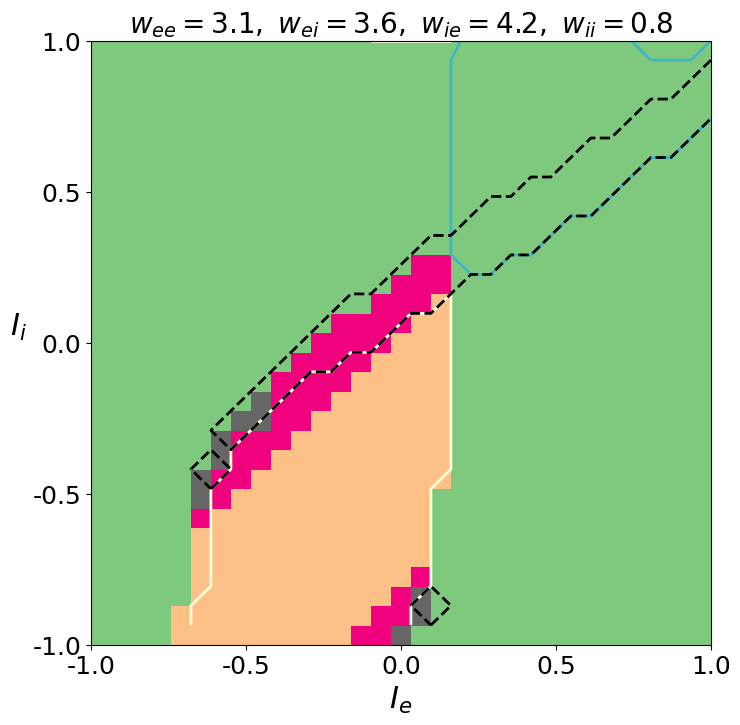

In [26]:
plotDiscreteMap(df2, title = r'$w_{ee}=3.1,\ w_{ei}=3.6,\ w_{ie}=4.2,\ w_{ii}=0.8$', colorbar=False)

In [27]:
df_show[df_show['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,turing_hopf,p_random
155,0,-0.666667,-1.000000,0,0,0,4
188,0,-0.600000,-0.866667,1,1,0,4
220,0,-0.533333,-0.800000,0,0,0,4
221,0,-0.533333,-0.733333,1,1,0,4
252,0,-0.466667,-0.733333,0,0,0,4
253,0,-0.466667,-0.666667,1,1,0,4


In [33]:
from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues, det, tr

sigma = 0.245 #b #2.8550 #a
tau = 2.4201

ee = -0.525
ii = -0.80

params={'I_e': ee, 'I_i': ii, 'end_t': 5000}#, 'sigma_i': sigma, 'tau_i': tau, 'length': 100, 'n': 256}
ps = setParams(params)

fps = computeFPs(ps)

stab = checkFixPtsStability(fps, ps)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

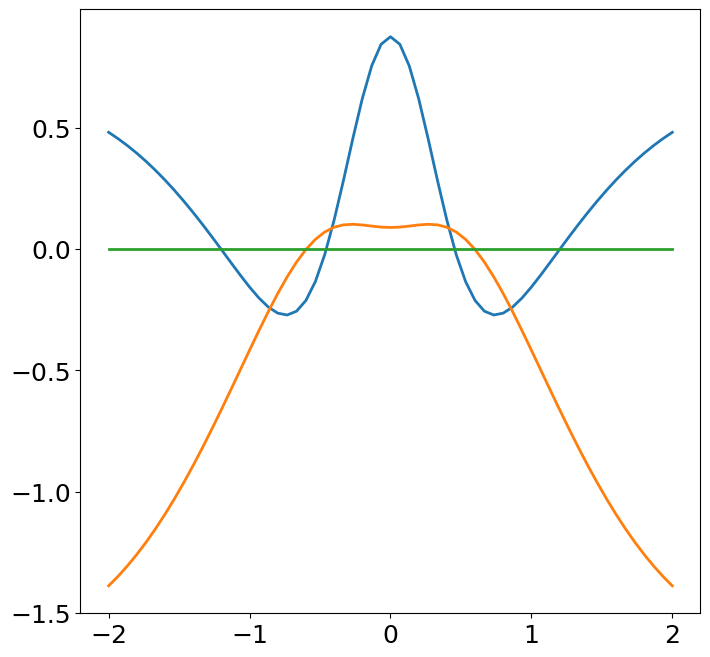

In [34]:
import matplotlib.pyplot as plt

plt.plot(k, determinant, k, trace)
plt.plot(k, zero)